In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [36]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
             optimizer = keras.optimizers.SGD(learning_rate=1e-3),
             metrics="mae")

In [12]:
model_history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.

In [13]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3942 - mae: 0.4502


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577126979827881,
  0.593418538570404,
  0.5557191371917725,
  0.5271905064582825,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779937505722046,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.42605164647102356,
  0.42017653584480286,
  0.41549986600875854,
  0.41116511821746826,
  0.4077068567276001,
  0.40395283699035645,
  0.4004494547843933,
  0.39796027541160583],
 'mae': [0.9900256991386414,
  0.6041509509086609,
  0.5618005990982056,
  0.5398454070091248,
  0.5237293243408203,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.4797375202178955,
  0.4744163453578949,
  0.4703480303287506,
  0.46740883588790894,
  0.4636021554470062,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.4545365273952484,
  0.4521064758300781,
  0.45083147287368774],
 'val_loss': [0.7126054763793945,
  0.6880088448524475,
  0.5803285837173462,
  0.516608536243

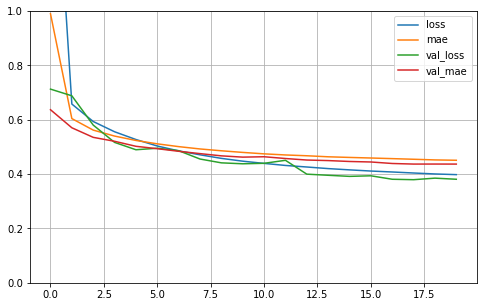

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [16]:
X_new = X_test[:3]

In [17]:
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.53287673]
 [1.8915396 ]
 [3.4040868 ]]
[0.477   0.458   5.00001]


In [18]:
del model

In [19]:
keras.backend.clear_session()

In [20]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu") (input_)
hidden2 = keras.layers.Dense(30, activation = "relu") (hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense (1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [22]:
model.compile(loss="mean_squared_error",
             optimizer = keras.optimizers.SGD(learning_rate=1e-3),
             metrics="mae")

In [23]:
model_history = model.fit(X_train, y_train, epochs = 40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 3ms/step - loss: 2.6311 - mae: 1.2215 - val_loss: 0.8798 - val_mae: 0.6026
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 0.7247 - mae: 0.6113 - val_loss: 0.6420 - val_mae: 0.5764
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6447 - mae: 0.5825 - val_loss: 0.5891 - val_mae: 0.5503
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.6127 - mae: 0.5669 - val_loss: 0.5455 - val_mae: 0.5343
Epoch 5/40
363/363 [==============================] - 1s 3ms/step - loss: 0.5640 - mae: 0.5459 - val_loss: 0.5409 - val_mae: 0.5202
Epoch 6/40
363/363 [==============================] - ETA: 0s - loss: 0.5332 - mae: 0.531 - 1s 2ms/step - loss: 0.5332 - mae: 0.5312 - val_loss: 0.4903 - val_mae: 0.5046
Epoch 7/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5296 - mae: 0.5245 - val_loss: 0.4728 - val_mae: 0.4962
Epoch 8/40
363/363 [==================

In [24]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 1ms/step - loss: 0.3684 - mae: 0.4314


In [25]:
print(mae_test)

[0.3684495985507965, 0.4313908517360687]


In [26]:
model_history.history

{'loss': [1.6920058727264404,
  0.6836402416229248,
  0.626488208770752,
  0.5877465605735779,
  0.5565561056137085,
  0.5311980247497559,
  0.5107864141464233,
  0.4951668083667755,
  0.4802228510379791,
  0.4684668779373169,
  0.45896390080451965,
  0.45022013783454895,
  0.4432655870914459,
  0.4363251030445099,
  0.4306240975856781,
  0.42534440755844116,
  0.4212935268878937,
  0.41681814193725586,
  0.4126456081867218,
  0.4095860719680786,
  0.40596330165863037,
  0.4029441177845001,
  0.4000454246997833,
  0.3971883952617645,
  0.3946213722229004,
  0.39249086380004883,
  0.3904934525489807,
  0.38845276832580566,
  0.3867104947566986,
  0.38484394550323486,
  0.38295263051986694,
  0.3815838396549225,
  0.38052698969841003,
  0.3787004351615906,
  0.3775610029697418,
  0.3762996792793274,
  0.3750821352005005,
  0.3740888237953186,
  0.37281912565231323,
  0.37164339423179626],
 'mae': [0.8892966508865356,
  0.5993583798408508,
  0.577479362487793,
  0.558142364025116,
  0.542

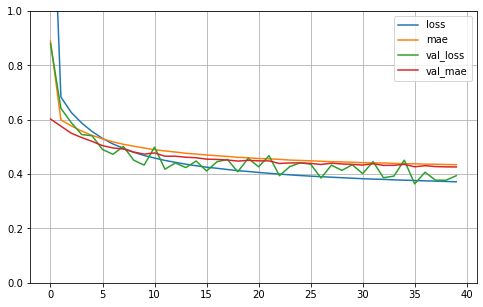

In [27]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Saving and Restoring

In [37]:
model.save("thebatmanv2.0.h5py")

INFO:tensorflow:Assets written to: thebatmanv2.0.h5py\assets


In [29]:
%pwd

'C:\\Users\\admin\\Desktop\\python'

In [30]:
del model

In [31]:
keras.backend.clear_session()

In [38]:
model = keras.models.load_model("thebatmanv2.0.h5pyy")

OSError: SavedModel file does not exist at: thebatmanv2.0.h5pyy\{saved_model.pbtxt|saved_model.pb}

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [40]:
y_pred=model.predict(X_new)
print(y_pred)

[[0.29032153]
 [0.26036867]
 [0.73302364]]


# Using callbacks during the training

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [44]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [45]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5py")

In [46]:
model_history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 3.3697 - val_loss: 0.7126
INFO:tensorflow:Assets written to: Model-01.h5py\assets
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6880
INFO:tensorflow:Assets written to: Model-02.h5py\assets
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6167 - val_loss: 0.5803
INFO:tensorflow:Assets written to: Model-03.h5py\assets
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5846 - val_loss: 0.5166
INFO:tensorflow:Assets written to: Model-04.h5py\assets
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
INFO:tensorflow:Assets written to: Model-05.h5py\assets
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
INFO:tensorflow:Assets written to: Model-06.h5py\assets
Epoch 7/10
363/363 [==============================] - 1s 3ms/ste

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.load_model("Model-10.h5py")

In [ ]:
mse_test = model.evaluate(X_test, y_test)

# Best model only

In [ ]:
del model
keras.backend.clear_session()

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5py", save_best_only=True)

In [ ]:
model_history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model("Best_Model.h5py")

In [ ]:
mse_test=model.evaluate(X_test,y_test)

# Early stop model

In [47]:
del model
keras.backend.clear_session()

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [49]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [50]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5py", save_best_only=True)

In [51]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True)

In [54]:
model_history = model.fit(X_train, y_train, epochs = 200, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/200
363/363 [==============================] - 2s 3ms/step - loss: 3.0681 - val_loss: 1.3779
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 2/200
363/363 [==============================] - 1s 2ms/step - loss: 0.8428 - val_loss: 0.6885
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 3/200
363/363 [==============================] - 1s 2ms/step - loss: 0.7087 - val_loss: 0.6645
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 4/200
363/363 [==============================] - 1s 2ms/step - loss: 0.6599 - val_loss: 0.5944
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 5/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5955 - val_loss: 0.5505
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 6/200
363/363 [==============================] - 1s 2ms/step - loss: 0.5569 - val_loss: 0.5211
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 7/20

Epoch 64/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3359 - val_loss: 0.3367
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 65/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3484 - val_loss: 0.3393
Epoch 66/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3438 - val_loss: 0.3389
Epoch 67/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3622 - val_loss: 0.3444
Epoch 68/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3429 - val_loss: 0.3391
Epoch 69/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3485 - val_loss: 0.3382
Epoch 70/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3425 - val_loss: 0.3492
Epoch 71/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3486 - val_loss: 0.3408
Epoch 72/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3321 - val_loss: 0.3356
INFO:tensorflow:As

Epoch 130/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3295 - val_loss: 0.3117
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 131/200
363/363 [==============================] - 1s 3ms/step - loss: 0.3346 - val_loss: 0.3260
Epoch 132/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3276 - val_loss: 0.3183
Epoch 133/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3174 - val_loss: 0.3206
Epoch 134/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3283 - val_loss: 0.3116
INFO:tensorflow:Assets written to: early_stop_model.h5py\assets
Epoch 135/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3249 - val_loss: 0.3666
Epoch 136/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3221 - val_loss: 0.3420
Epoch 137/200
363/363 [==============================] - 1s 2ms/step - loss: 0.3176 - val_loss: 0.3616
Epoch 138/200
363/363 [=========================

In [57]:
model = keras.models.load_model("early_stop_model.h5py")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3178
